# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [3]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/penguins_size.csv')
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
164,Chinstrap,Dream,47.0,17.3,185.0,3700.0,FEMALE
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,MALE
36,Adelie,Dream,38.8,20.0,190.0,3950.0,MALE
203,Chinstrap,Dream,51.4,19.0,201.0,3950.0,MALE
45,Adelie,Dream,39.6,18.8,190.0,4600.0,MALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,FEMALE
175,Chinstrap,Dream,50.6,19.4,193.0,3800.0,MALE
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,FEMALE
95,Adelie,Dream,40.8,18.9,208.0,4300.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [4]:
#2
df.info()

# Ada 344 entri / baris di dalam DataFrame
# Index dari 0 sampai 343
# Total ada 7 kolom dalam DataFrame ini
# Kolom Spesies : ada 344 baris non-null dengan tipe data object
# Kolom island : ada 344 baris non-null dengan tipe data object
# Kolom culmen_length_mm : ada 342 baris non-null, 2 baris null dengan tipe data float64
# Kolom culmen_depth_mm : ada 342 baris non-null, 2 baris null dengan tipe data float64
# Kolom flipper_length_mm : ada 342 baris non-null, 2 baris null dengan tipe data float64
# Kolom body_mass_g : ada 342 baris non-null, 2 baris nu;; dengan tipe data float64
# Kolom sex : ada 344 baris non-null dengan tipe data object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [5]:
#3
df.describe()

#conclusion
# Tabel ini merangkum statistik deskriptif dari 4 kolom numerik : culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g
# Terdapat 342 nilai untuk culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g
# Mean untuk culmen_length_mm (43.92), culmen_depth_mm (17.15), flipper_length_mm (200.91), body_mass_g (4201.75)
# Standard deviation untuk culmen_length_mm (5.45), culmen_depth_mm (1.97), flipper_length_mm (14.06), body_mass_g (801.95)
# Min untuk culmen_length_mm (32.1), culmen_depth_mm (13.1), flipper_length_mm (172), body_mass_g (2700)
# 25% quartile 1 untuk culmen_length_mm dibawah (39.22) , culmen_depth_mm dibawah (15.6), flipper_length_mm dibawah (190), body_mass_g (3550)
# 50% median untuk culmen_length_mm (44.45), culmen_depth_mm (17.3), flipper_length_mm (197), body_mass_g (4050)
# 75% quartile 3 untuk culmen_length_mm dibawah (48.5) , culmen_depth_mm dibawah (18.7), flipper_length_mm (213), body_mass_g (4750)
# Max untuk culmen_length_mm (59.6), culmen_depth_mm (21.5), flipper_length_mm (231), body_mass_g (6300)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [6]:
#4
species_count = df['species'].value_counts(dropna=False)
print(species_count)
island_count = df['island'].value_counts(dropna=False)
print(island_count)
sex_count = df['sex'].value_counts(dropna=False)
print(sex_count)

# Conclusion
# species: Terdapat 3 jenis penguin di dalam dataset, yaitu Adelie (152), Gentoo (124), dan Chinstrap (68).
# island: Pengamatan penguin diambil dari 3 pulau, yaitu Biscoe (168), Dream (124), dan Torgersen (52).
# sex: Data jenis kelamin penguin terdiri dari MALE (168) dan FEMALE (165). Terdapat 10 entri yang NaN (kosong/tidak diketahui) dan 1 entri dengan ".".

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [7]:
#5
df = df.dropna()
df.isnull().sum()

# Conclusion
# Semua baris yang memiliki nilai NaN dihapus dari DataFrame. Jumlah nilai NaN diperiksa untuk memastikan bahwa tidak ada nilai yang hilang setelah penghapusan.

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

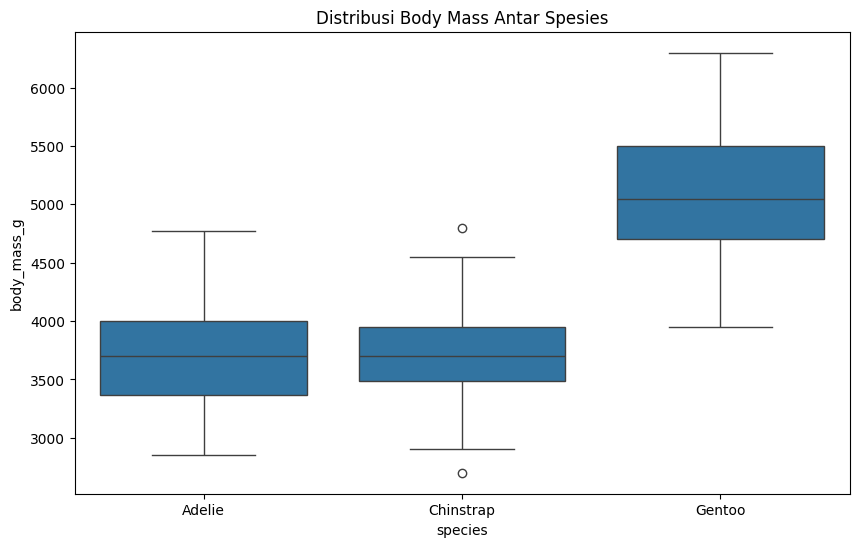

In [8]:
# 6
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Distribusi Body Mass Antar Spesies')
plt.show()

# Conclusion
# Visualisasi ini menampilkan distribusi massa tubuh (body mass) antar spesies penguin dalam bentuk box plot.
# Dari grafik ini, terlihat bahwa spesies Gentoo cenderung memiliki massa tubuh yang lebih tinggi dibandingkan dengan Adelie dan Chinstrap.
# Median massa tubuh penguin Gentoo berada di atas 5.000 gram, sedangkan Adelie dan Chinstrap cenderung memiliki massa tubuh sekitar 3.500-4.000 gram.
# Terdapat Outliers juga untuk penguin Chinstrap dan Adelie.

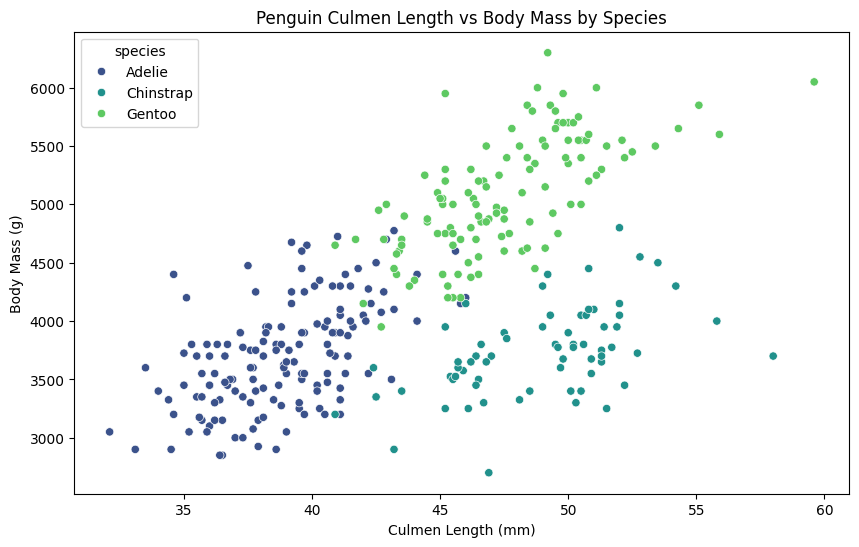

In [9]:
#6
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='culmen_length_mm', y='body_mass_g', hue='species', palette='viridis')

plt.title('Penguin Culmen Length vs Body Mass by Species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

# Visualisasi ini menunjukkan bahwa penguin spesies Gentoo cenderung memiliki panjang paruh dan berat tubuh yang lebih besar dibandingkan dengan spesies Adelie dan Chinstrap, yang terlihat dari sebaran titik di bagian kanan atas grafik.
# Selain itu, pola yang terlihat menunjukkan bahwa semakin panjang paruh penguin, semakin besar kemungkinan berat tubuhnya juga akan meningkat, terutama pada spesies Gentoo.

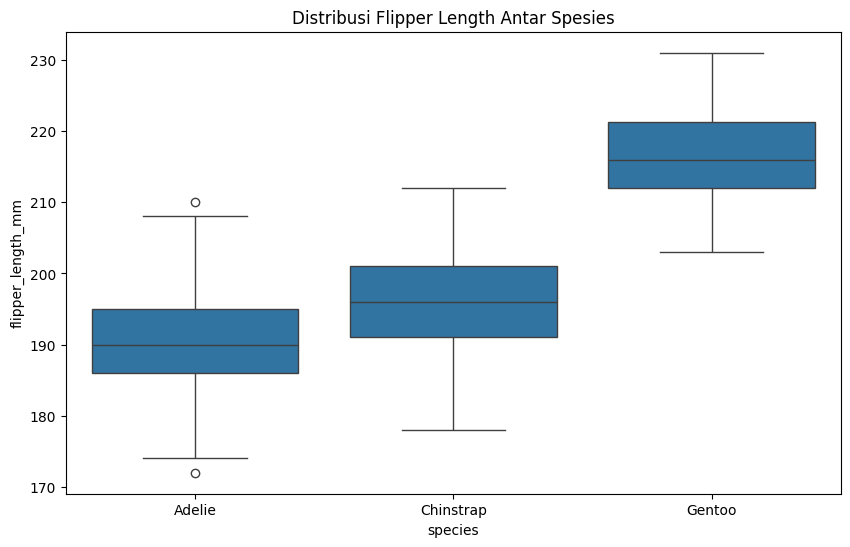

In [10]:
# 6
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Distribusi Flipper Length Antar Spesies')
plt.show()

# Conclusion
# Penguin Gentoo memiliki flipper length terbesar secara keseluruhan dibandingkan dua spesies lainnya, dengan rentang yang lebih tinggi dan median yang paling besar.
# Chinstrap dan Adelie memiliki flipper length yang lebih pendek dengan distribusi yang lebih sempit, meskipun Chinstrap sedikit lebih panjang dibandingkan Adelie.
# Terdapat outlier pada spesies Adelie yang menunjukkan ada penguin dengan flipper length yang lebih pendek dari rentang normal.

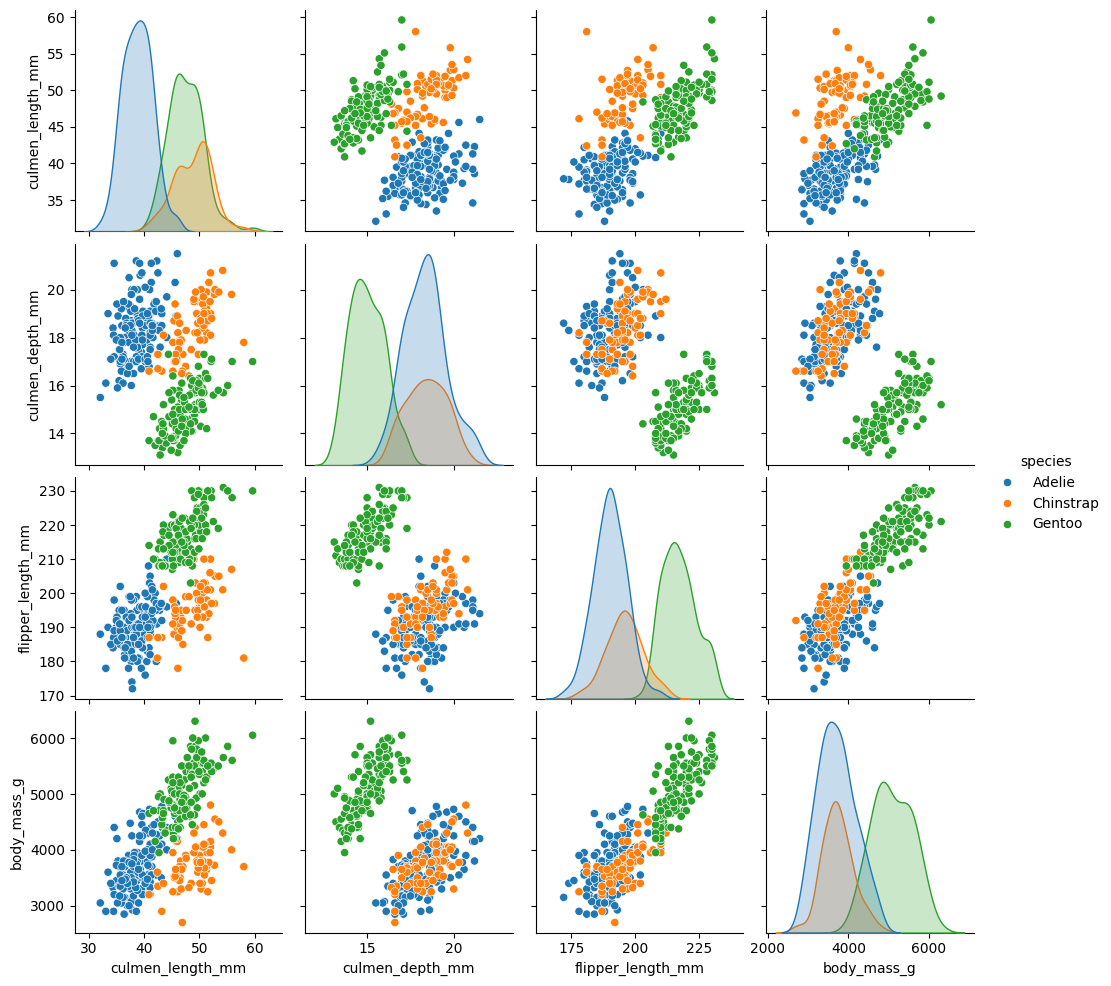

In [11]:
# 6
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

# Conclusion
# Perbedaan antar spesies: Setiap spesies terlihat membentuk kluster yang terpisah dalam scatter plot, menunjukkan bahwa variabel culmen length, culmen depth, flipper length, dan body mass memiliki distribusi yang berbeda untuk masing-masing spesies.
# Hubungan antar variabel: Body mass memiliki korelasi positif dengan culmen length dan flipper length, terutama untuk spesies Gentoo (hijau), yang menunjukkan bahwa penguin dengan flipper dan culmen lebih panjang cenderung memiliki massa tubuh yang lebih besar.
# Distribusi univariat: Diagonal plot menunjukkan distribusi masing-masing variabel seperti culmen length pada Gentoo memiliki distribusi yang berbeda dan lebih besar dibandingkan spesies lainnya.

7. Check unique value of our target variable

In [12]:
#7
df['species'].unique().tolist()

# Conclusion
# Mengambil nilai unik dalam kolom spesies dan di convert ke list.

['Adelie', 'Chinstrap', 'Gentoo']

8. encode categorical columns and display the results

In [13]:
#8
island_mapping = {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
sex_mapping = {'MALE': 2, 'FEMALE': 1}
df['island'] = df['island'].map(island_mapping)
df['sex'] = df['sex'].map(sex_mapping)
df['sex'] = df['sex'].fillna(0).astype(int)
df.head()

# Conclusion
# Memetakan nilai categorical island dan sex ke nilai numerik.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [14]:
#9
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
df['species'] = df['species'].map(species_mapping)
df.head()

# Conclusion
# Memetakan nilai categorical spesies ke nilai numerik.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

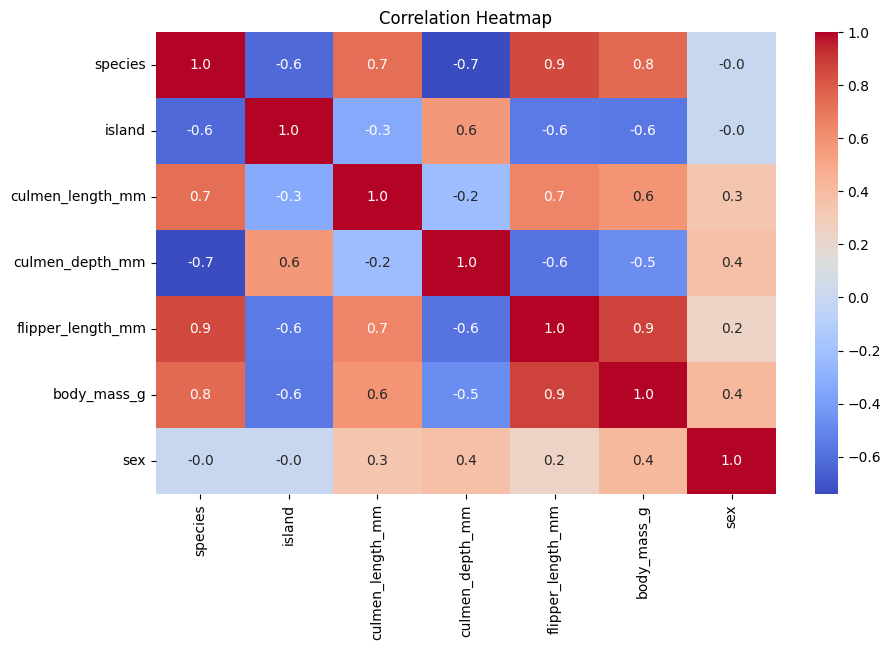

In [15]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

# Conclusion
# Beberapa info yang didapat:
# Ada korelasi tinggi antara flipper_length_mm dan body_mass_g (0.9), menunjukkan bahwa semakin panjang sirip, semakin berat penguin.
# species berkorelasi kuat dengan flipper_length_mm (0.9) dan body_mass_g (0.8), yang berarti perbedaan spesies penguin dapat dikaitkan dengan perbedaan panjang sirip dan massa tubuh.
# culmen_depth_mm berkorelasi negatif dengan species (-0.7), menunjukkan bahwa penguin dengan paruh yang lebih dalam cenderung berasal dari spesies tertentu.
# Korelasi antara variabel lain seperti sex dan variabel lain lebih rendah, yang menunjukkan tidak ada hubungan yang signifikan.

## Machine Learning

1. Splitting X and y

In [16]:
#1
X = df.drop('species', axis=1)
y = df['species']

# X: Semua fitur (kolom) dalam dataset kecuali kolom species. Ini adalah variabel independen (fitur) yang akan digunakan untuk memprediksi.
# y: Kolom species, yang merupakan target atau label yang ingin diprediksi.

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [17]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data displit menjadi data train dan data test

In [18]:
#3
X_train.shape, X_test.shape

# Menunjukkan jumlah baris (contoh data) dan jumlah kolom (fitur).

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [19]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Menciptakan objek clf_entropy sebagai model Decision Tree dengan kriteria pembagian yang ditentukan oleh entropy.
# Parameter random_state=42 digunakan untuk memastikan bahwa hasil yang diperoleh dapat dihasilkan di lain waktu dengan pengacakan yang konsisten.
# Melatih model Decision Tree menggunakan data pelatihan (X_train) dan labelnya (y_train).
# Proses ini mengajarkan model bagaimana mengklasifikasikan data berdasarkan fitur yang ada pada X_train.

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [20]:
#b
y_pred_entropy = clf_entropy.predict(X_test)

# Menentukan label spesies penguin berdasarkan fitur yang ada di data pengujian.

In [21]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy: " , accuracy_entropy)

# Gambaran umum tentang seberapa efektif model dalam mengenali spesies penguin berdasarkan fitur yang diberikan.
# Nilai 0.985 menunjukkan bahwa model berhasil memprediksi label spesies penguin dengan benar sebanyak 98.5% dari seluruh data pengujian yang digunakan.

Model accuracy score with criterion entropy:  0.9850746268656716


In [22]:
#d
train_score = clf_entropy.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Skor pada test set
test_score = clf_entropy.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")


# Training set score: 1.0000: Ini berarti model mencapai akurasi 100% pada data pelatihan, yang menunjukkan bahwa model berhasil mengklasifikasikan semua data pelatihan dengan benar.
# Test set score: 0.9851: Ini berarti model mencapai akurasi sekitar 98.51% pada data pengujian.

Training set score: 1.0000
Test set score: 0.9851


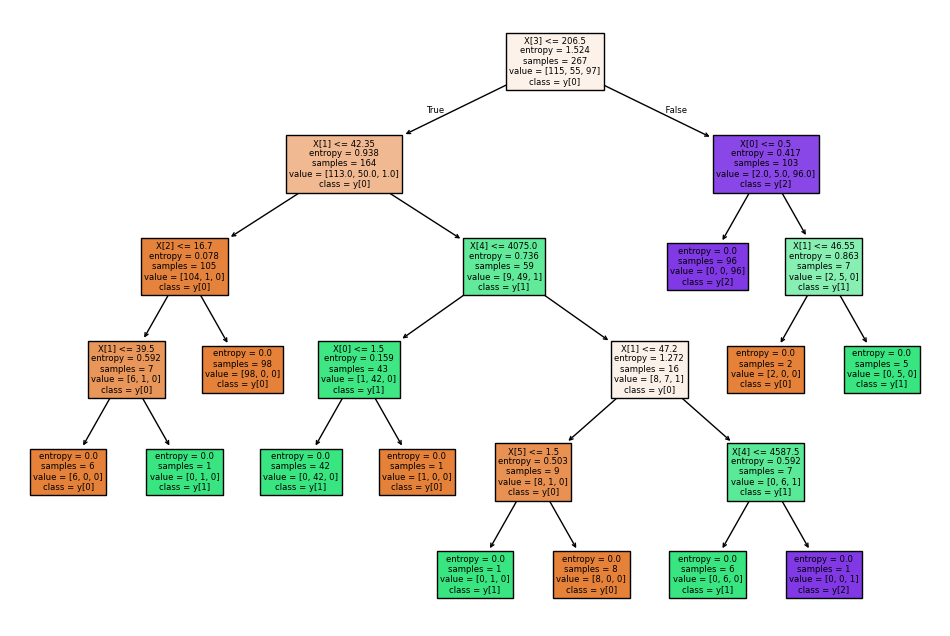

In [23]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy, feature_names=[f"X[{i}]" for i in range(X.shape[1])], filled=True, class_names=True)
plt.show()

# Conclusion
# Node Akar (X[3] <= 206.5): Titik awal pemisahan, yang memeriksa apakah fitur X[3] atau culmen_length_mm kurang dari atau sama dengan 206.5.
# Entropy = 1.524 (menunjukkan tingkat ketidakpastian/keragaman data).
# Ada 267 sampel di node ini, terbagi dalam tiga kelas: 115 sampel di kelas y[0], 55 sampel di kelas y[1], dan 97 sampel di kelas y[2], Kelas mayoritas di sini adalah y[0].

# Cabang Kiri (X[1] <= 42.35): Setelah memisahkan berdasarkan X[3] <= 206.5, cabang kiri memeriksa apakah X[1] atau island kurang dari atau sama dengan 42.35.
# Entropy di node ini lebih rendah, yaitu 0.938.
# 164 sampel tersisa, mayoritas di kelas y[0] (113 sampel di y[0], 50 di y[1], dan 1 di y[2]). Cabang ini kemudian dipecah lagi berdasarkan X[2] <= 16.7. Cabang Kanan (X[3] > 206.5):

# Jika X[3] lebih besar dari 206.5, maka data menuju ke cabang kanan.
# Entropy di sini lebih rendah, yaitu 0.417, dengan 103 sampel yang mayoritas berada di kelas y[2] (96 sampel di y[2]).
# Cabang ini memeriksa lebih lanjut apakah X[0] (fitur pertama) <= 0.5, kemudian dibagi lagi berdasarkan X[4] (fitur keempat) dan X[1].

# Node:
# Setiap cabang pada akhirnya mencapai node daun, di mana entropy menjadi 0, artinya tidak ada lagi ketidakpastian, dan semua sampel di node tersebut termasuk dalam satu kelas tertentu.
# Inti dari model ini adalah bahwa Decision Tree membagi data menjadi kelompok-kelompok yang lebih kecil berdasarkan fitur-fitur tertentu, sampai mencapai titik di mana setiap kelompok memiliki klasifikasi yang jelas (entropy 0).
# Model ini menggunakan fitur-fitur seperti X[1], X[2], dan X[3] untuk memutuskan bagaimana membagi data dengan cara yang meminimalkan ketidakpastian atau keragaman di setiap cabang.

2. Criterion Gini index

In [24]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Menciptakan objek clf_gini sebagai model Decision Tree dengan kriteria pembagian yang ditentukan oleh gini.
# Parameter random_state=42 digunakan untuk memastikan bahwa hasil yang diperoleh dapat dihasilkan di lain waktu dengan pengacakan yang konsisten.
# Melatih model Decision Tree menggunakan data pelatihan (X_train) dan labelnya (y_train).
# Proses ini mengajarkan model bagaimana mengklasifikasikan data berdasarkan fitur yang ada pada X_train.

DecisionTreeClassifier(random_state=42)

In [25]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Menentukan label spesies penguin berdasarkan fitur yang ada di data pengujian.

In [26]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini: " , accuracy_gini)

# Nilai 1.0 menunjukkan bahwa model Decision Tree yang menggunakan kriteria Gini berhasil mencapai akurasi 100% pada data pengujian.

Model accuracy score with criterion gini:  1.0


In [27]:
#d
train_score = clf_gini.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Skor pada test set
test_score = clf_gini.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

# Hasil "Training set score: 1.0000" dan "Test set score: 1.0000" menunjukkan bahwa model berhasil mencapai akurasi 100% pada baik data pelatihan maupun data pengujian.

Training set score: 1.0000
Test set score: 1.0000


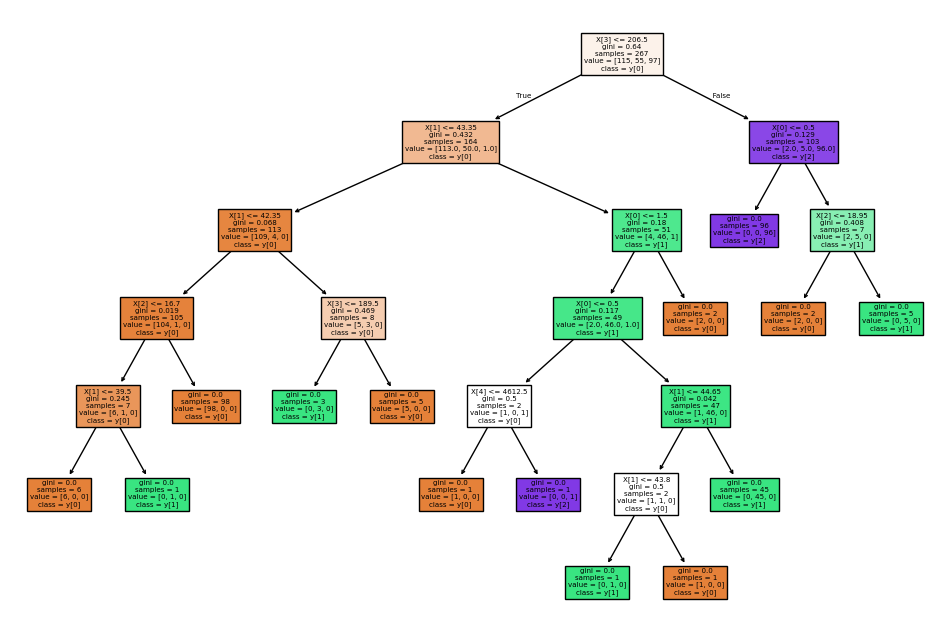

In [28]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini, feature_names=[f"X[{i}]" for i in range(X.shape[1])], filled=True, class_names=True)
plt.show()

# Conclusion
# Node Akar (X[3] <= 206.5): Node awal yang memisahkan data berdasarkan fitur X[3].
# Gini: 0.647 (menunjukkan tingkat ketidakmurnian data).
# Terdapat 267 sampel di node ini, dengan pembagian: 115 sampel di kelas y[0], 55 sampel di kelas y[1], dan 97 sampel di kelas y[2]. Kelas mayoritas: y[0].

# Cabang Kiri (X[1] <= 42.33): Cabang ini memeriksa fitur X[1] untuk menentukan apakah nilainya kurang dari atau sama dengan 42.33.
# Gini: 0.0 (murni), artinya semua sampel di node ini termasuk dalam kelas y[0].
# Sampel: 113, dengan mayoritas di kelas y[0].

#Cabang Kanan (X[3] > 206.5): Cabang ini membawa data ke sisi kanan pohon jika X[3] > 206.5.
# Node ini memecah data lebih lanjut berdasarkan fitur X[0] <= 0.5.
# Gini di node ini rendah (0.129), dengan sebagian besar sampel di kelas y[2].
# 103 sampel ada di node ini, dan mayoritasnya masuk ke kelas y[2].

# Node:
# Gini = 0: Ini berarti semua sampel dalam node tersebut berada di satu kelas yang sama, sehingga tidak ada ketidakmurnian (pure node).
# Nilai (value): Menunjukkan jumlah sampel yang termasuk dalam setiap kelas.
# Class: Menampilkan kelas yang dipilih untuk semua sampel di node tersebut.

# Ketika Decision Tree mencapai node daun, algoritma telah selesai memproses data, dan node tersebut memberikan klasifikasi akhir untuk sampel yang ada di sana.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [29]:
#f
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):")
print(conf_matrix_entropy)

# Untuk spesies Adelie (kelas 0), model memprediksi 30 dengan benar, tetapi 1 salah prediksi ke kelas Chinstrap (kelas 1).
# Untuk spesies Chinstrap (kelas 1), model berhasil memprediksi semua 13 dengan benar.
# Untuk spesies Gentoo (kelas 2), model juga berhasil memprediksi semua 23 dengan benar.

Confusion Matrix (Entropy):
[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]


In [30]:
#g
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix (Gini):")
print(conf_matrix_gini)

# Untuk spesies Adelie (kelas 0), model berhasil memprediksi semua 31 dengan benar.
# Untuk spesies Chinstrap (kelas 1), model berhasil memprediksi semua 13 dengan benar.
# Untuk spesies Gentoo (kelas 2), model juga berhasil memprediksi semua 23 dengan benar.

Confusion Matrix (Gini):
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [31]:
#h
class_report_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report (Entropy):")
print(class_report_entropy)

class_report_gini = classification_report(y_test, y_pred_gini)
print("Classification Report (Gini):")
print(class_report_gini)

# Entropy
# Precision: Menunjukkan proporsi prediksi positif yang benar. Misalnya, untuk spesies Adelie (kelas 0), precision 1.00 berarti semua prediksi untuk kelas ini benar.
# Recall: Menunjukkan kemampuan model dalam menangkap semua instance positif. Untuk spesies Chinstrap (kelas 1), recall 1.00 berarti model berhasil mengidentifikasi semua 13 penguin Chinstrap.
# F1-score: Harmonic mean dari precision dan recall. Untuk semua kelas, f1-score mendekati 1 menunjukkan keseimbangan yang baik antara precision dan recall.
# Akurasi: Total akurasi model adalah 0.99, yang berarti 99% dari prediksi adalah benar.

# Gini
# Model ini menunjukkan hasil yang sempurna dengan semua nilai precision, recall, dan f1-score mencapai 1.00 untuk setiap spesies.
# Ini berarti model dapat mengklasifikasikan semua spesies dengan akurasi 100%, menangkap semua instance positif tanpa kesalahan.

Classification Report (Entropy):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

Classification Report (Gini):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [32]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)


# Inisialisasi objek model Naive Bayes dengan distribusi Gaussian untuk fitur numerik.
# Melatih model pada data pelatihan (X_train sebagai fitur dan y_train sebagai target).
# Model akan belajar dari data ini untuk mengidentifikasi pola yang ada dan mempersiapkan diri untuk melakukan prediksi pada data baru.

GaussianNB()

In [33]:
#b
y_pred_nb = nb.predict(X_test)

# Menentukan label spesies penguin berdasarkan fitur yang ada di data pengujian.

In [34]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Model accuracy score with Naive Bayes: " , accuracy_nb)


#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

# Hasil yang diperoleh menunjukkan bahwa model Naive Bayes memiliki akurasi sempurna dengan nilai 1.0, yang berarti model berhasil mengklasifikasikan semua data pengujian dengan benar.

#Confusion Matrix menunjukkan:
# Baris pertama (kelas 0): 31 prediksi benar (Adelie), tidak ada kesalahan.
# Baris kedua (kelas 1): 13 prediksi benar (Chinstrap), tidak ada kesalahan.
# Baris ketiga (kelas 2): 23 prediksi benar (Gentoo), tidak ada kesalahan.

Model accuracy score with Naive Bayes:  1.0
Confusion Matrix (Naive Bayes):
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


In [35]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):")
print(class_report_nb)

# Precision: Semua kelas memiliki nilai 1.00, yang berarti setiap prediksi positif untuk masing-masing spesies (Adelie, Chinstrap, Gentoo) adalah benar, tanpa ada kesalahan.
# Recall: Nilai 1.00 pada semua kelas menunjukkan bahwa model berhasil mengidentifikasi semua instance dari setiap spesies tanpa ada yang terlewat.
# F1-Score: Juga 1.00 untuk setiap kelas, menunjukkan keseimbangan sempurna antara precision dan recall.
# Support: Menunjukkan jumlah aktual untuk setiap kelas dalam dataset pengujian (31 untuk Adelie, 13 untuk Chinstrap, dan 23 untuk Gentoo).

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [36]:
#f
# Akurasi Model: Model Naive Bayes mencapai skor akurasi 1.0 pada set uji, menunjukkan bahwa model ini sangat efektif dalam mengklasifikasikan spesies penguin berdasarkan fitur yang diberikan.
# Confusion Matriks: Semua prediksi benar, dengan tidak ada kesalahan klasifikasi untuk setiap spesies.
# Classification Report: Semua metrik menunjukkan nilai 1.00, yang berarti model berhasil mencapai presisi, recall, dan F1-score sempurna untuk setiap kelas.
# Secara keseluruhan, klasifier Naive Bayes menunjukkan kinerja yang sangat baik dengan akurasi sempurna dan tidak ada kesalahan klasifikasi.
# Model ini cocok untuk digunakan dalam pengklasifikasian spesies penguin pada dataset ini.

Good Luck :)